In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.patches as mpatches
import os

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import desc

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
recent_row = session.query(Measurement).first()
recent_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc3ace703a0>,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [12]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# Find the most recent date in the data set.
recent_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_row

('2017-08-23')

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
recent_row

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores

aug_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "08").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    filter(func.strftime("%d", Measurement.date) >= "23").\
                    order_by(Measurement.date).all()

sept_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "09").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

oct_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "10").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

nov_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "11").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

dec_16 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "12").\
                    filter(func.strftime("%Y", Measurement.date) == "2016").\
                    order_by(Measurement.date).all()

jan_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "01").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

feb_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "02").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

mar_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "03").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

apr_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "04").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

may_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "05").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

jun_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "06").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

jul_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "07").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    order_by(Measurement.date).all()

aug_17 = session.query(Measurement.date, Measurement.prcp).\
                    filter(func.strftime("%m", Measurement.date) == "08").\
                    filter(func.strftime("%Y", Measurement.date) == "2017").\
                    filter(func.strftime("%d", Measurement.date) <= "23").\
                    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
aug_16_df = pd.DataFrame(aug_16, columns=['date','prcp'])
sept_16_df = pd.DataFrame(sept_16, columns=['date','prcp'])
oct_16_df = pd.DataFrame(oct_16, columns=['date','prcp'])
nov_16_df = pd.DataFrame(nov_16, columns=['date','prcp'])
dec_16_df = pd.DataFrame(dec_16, columns=['date','prcp'])
jan_17_df = pd.DataFrame(jan_17, columns=['date','prcp'])
feb_17_df = pd.DataFrame(feb_17, columns=['date','prcp'])
mar_17_df = pd.DataFrame(mar_17, columns=['date','prcp'])
apr_17_df = pd.DataFrame(apr_17, columns=['date','prcp'])
may_17_df = pd.DataFrame(may_17, columns=['date','prcp'])
jun_17_df = pd.DataFrame(jun_17, columns=['date','prcp'])
jul_17_df = pd.DataFrame(jul_17, columns=['date','prcp'])
aug_17_df = pd.DataFrame(aug_17, columns=['date','prcp'])

#Combine DataFrames
from functools import reduce


dfs = [aug_16_df,sept_16_df,oct_16_df,nov_16_df,dec_16_df,
            jan_17_df,feb_17_df,mar_17_df,apr_17_df,may_17_df,
            jun_17_df,jul_17_df,aug_17_df]
nan_value = 0

prcp_year_aug_16_17 = pd.concat(dfs).fillna(nan_value)


# Sort the dataframe by date
prcp_year_aug_16_17 = prcp_year_aug_16_17.sort_values('date',ascending=True)
prcp_year_aug_16_17



,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02
...,...,...
86,2017-08-22,0.50
89,2017-08-23,0.08
87,2017-08-23,0.00
88,2017-08-23,0.00


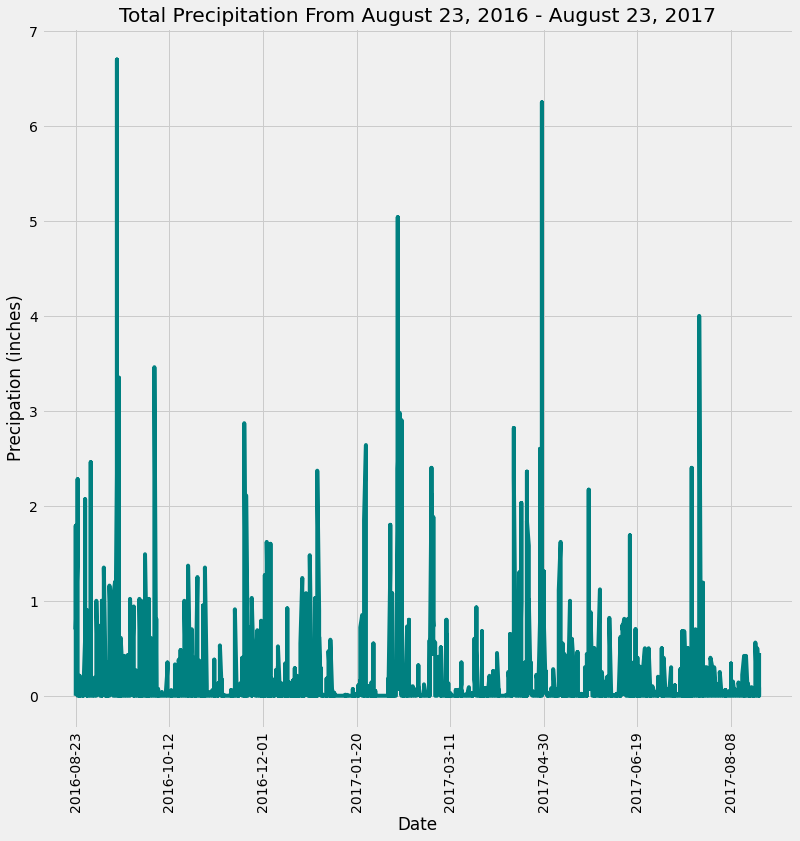

In [16]:
fig, ax = plt.subplots(figsize=(12,12))

ax.plot(prcp_year_aug_16_17['date'],prcp_year_aug_16_17['prcp'],color='teal')
ax.set(xlabel="Date",ylabel="Precipation (inches)", title = "Total Precipitation From August 23, 2016 - August 23, 2017")
ax.xaxis.set_major_locator(plt.MaxNLocator(9))
plt.xticks(rotation = 90)
plt.show()



In [17]:
 #Use Pandas to print the summary statistics for the precipitation data.

 prcp_year_aug_16_17.describe()


,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
recent_row = session.query(Station).first()
recent_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc3ad3d68b0>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

In [19]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
station_count = session.query(Station).distinct(Station.station, Station.name).count()

print(f'There are {station_count} stations in the dataset.')

There are 9 stations in the dataset.


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_sts = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
print(f'The most active stations by record count are {active_sts}.')

The most active stations by record count are [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)].


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_st = active_sts[0][0]
active_st_min = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


active_st_max = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


active_st_mean = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


print(f'USC00519281 lowest recorded temperature was {active_st_min} degrees.')
print(f'USC00519281 highest recorded temperature was {active_st_max} degrees.')
print(f'USC00519281 had an average temperature of {active_st_mean} degrees.')

USC00519281 lowest recorded temperature was [(54.0,)] degrees.
USC00519281 highest recorded temperature was [(85.0,)] degrees.
USC00519281 had an average temperature of [(71.66378066378067,)] degrees.


In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_st_year = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
                filter(Measurement.station == most_active_st).\
                filter(Measurement.date >= year_ago).all()
active_st_year_df = pd.DataFrame(active_st_year)
active_st_year_df.head()

,station,tobs,date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27


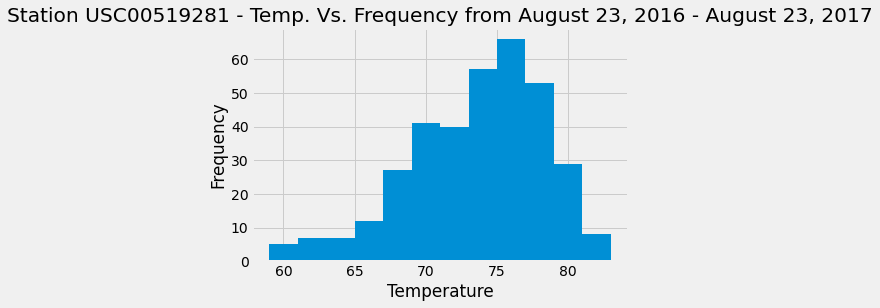

In [28]:
active_st_year_df.hist(bins=12)

plt.title("Station USC00519281 - Temp. Vs. Frequency from August 23, 2016 - August 23, 2017")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [29]:
# Close Session
session.close()